 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [224]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [225]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(ascending = True, inplace = True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [226]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [227]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [228]:
# Reading algorithmic returns
algo_path = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(ascending = True, inplace = True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [229]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [230]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [231]:
# Reading S&P 500 Closing Prices
SP500_path = Path('Resources/sp500_history.csv')
SP500_df = pd.read_csv(SP500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
SP500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [232]:
# Check Data Types
SP500_df.dtypes

Close    object
dtype: object

In [233]:
# Fix Data Types
SP500_df["Close"] = SP500_df["Close"].str.replace('$','').astype("float")
SP500_df.sort_index(inplace = True)
SP500_df

<ipython-input-233-cf8da25db4e5>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  SP500_df["Close"] = SP500_df["Close"].str.replace('$','').astype("float")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [234]:
# Calculate Daily Returns
SP500_daily_returns = SP500_df.pct_change()

In [235]:
# Drop nulls
SP500_daily_returns.dropna(inplace = True)
SP500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [236]:
# Rename `Close` Column to be specific to this portfolio.
SP500_daily_returns.rename(columns = {"Close":"SP500"}, inplace = True)
SP500_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [237]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_daily_returns = pd.concat([whale_df, algo_df, SP500_daily_returns], axis="columns", join='inner')
all_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

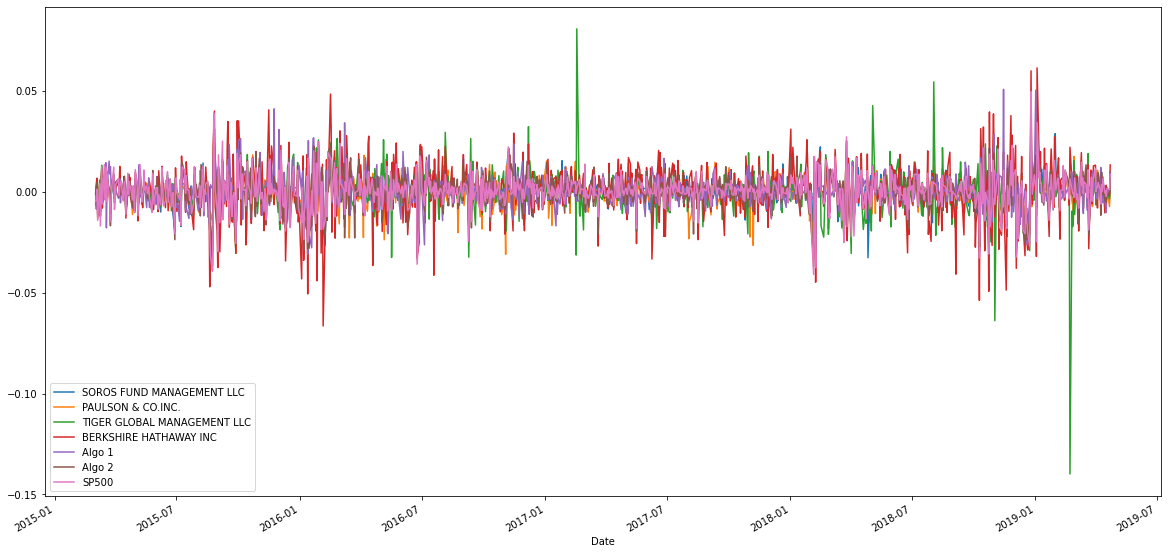

In [238]:
# Plot daily returns of all portfolios
all_daily_returns.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

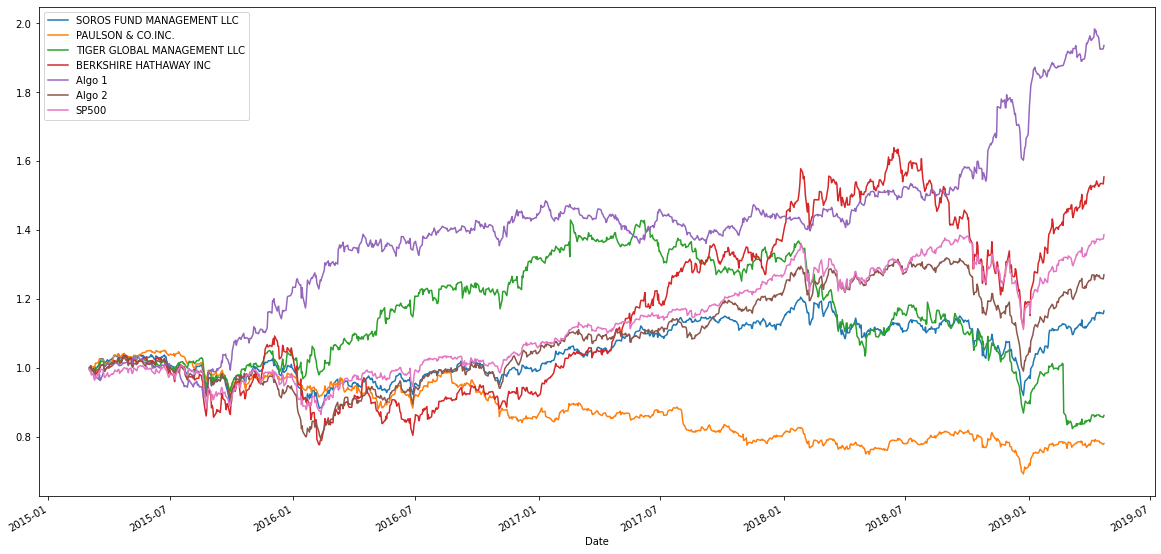

In [239]:
# Calculate cumulative returns of all portfolios
df_cum = (1 + all_daily_returns).cumprod()
# Plot cumulative returns
df_cum.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

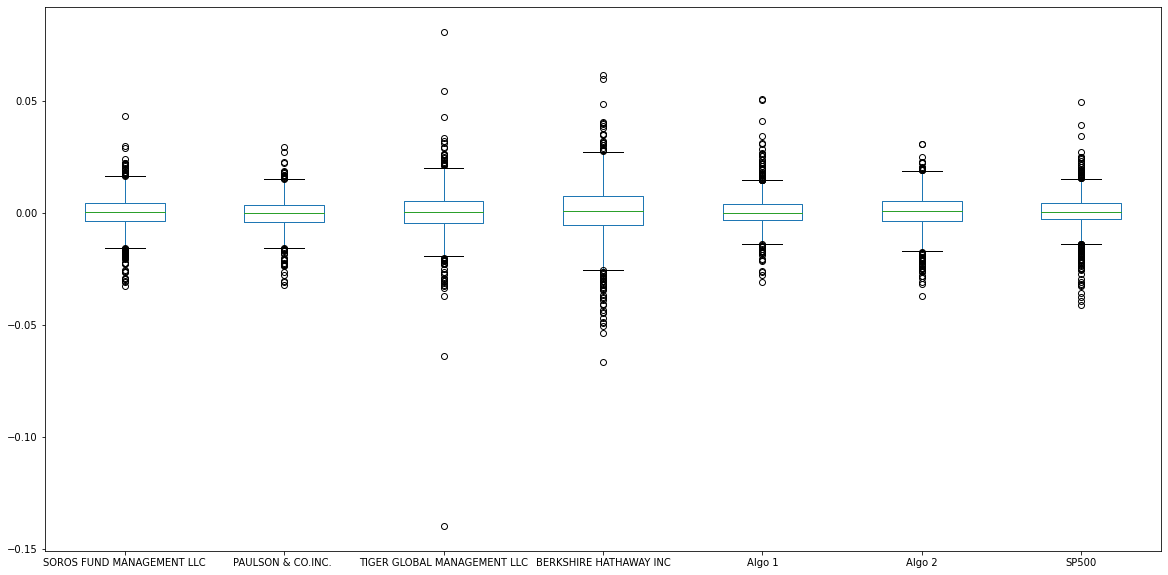

In [240]:
# Box plot to visually show risk
all_daily_returns.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [241]:
# Calculate the daily standard deviations of all portfolios
all_daily_std = pd.DataFrame(all_daily_returns.std()).rename(columns = {0:"STD"})
all_daily_std.sort_values(['STD'], ascending=False)

,STD
BERKSHIRE HATHAWAY INC,0.012919
TIGER GLOBAL MANAGEMENT LLC,0.010894
SP500,0.008554
Algo 2,0.008342
SOROS FUND MANAGEMENT LLC,0.007895
Algo 1,0.007620
PAULSON & CO.INC.,0.007023


### Determine which portfolios are riskier than the S&P 500

In [242]:
# Calculate  the daily standard deviation of S&P 500
SP500_std = pd.DataFrame(SP500_daily_returns.std())
# Determine which portfolios are riskier than the S&P 500
higher_std = all_daily_std[all_daily_std["STD"] > all_daily_std.loc["SP500", "STD"]]
higher_std

,STD
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [243]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_daily_std*np.sqrt(252)
annualized_std.sort_values(['STD'], ascending=False)

,STD
BERKSHIRE HATHAWAY INC,0.205077
TIGER GLOBAL MANAGEMENT LLC,0.172936
SP500,0.135786
Algo 2,0.132430
SOROS FUND MANAGEMENT LLC,0.125335
Algo 1,0.120967
PAULSON & CO.INC.,0.111488


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD'}, xlabel='Date'>

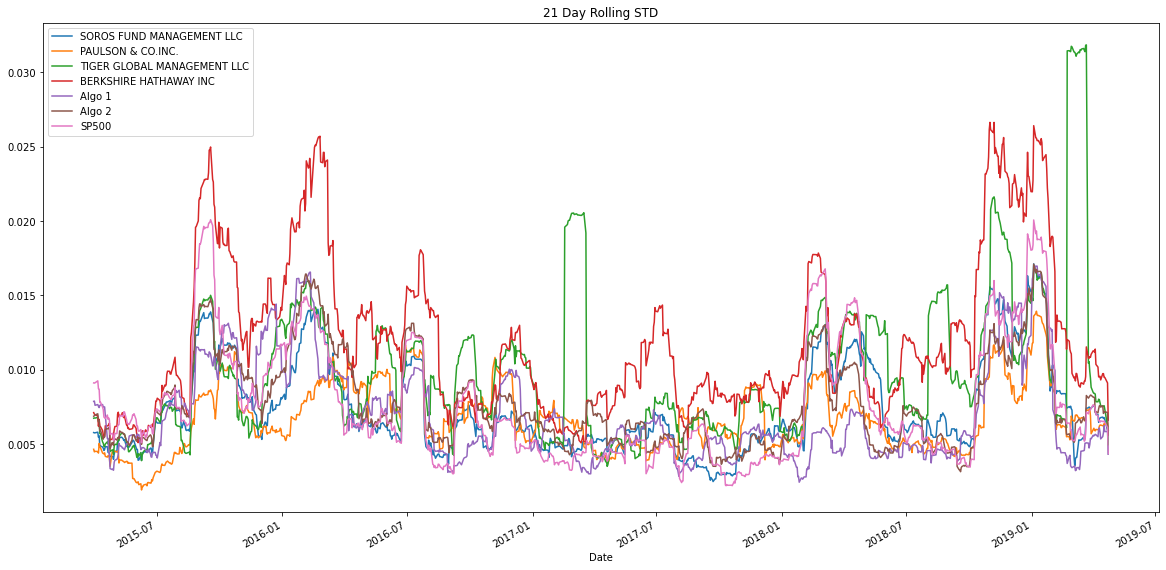

In [244]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_rolling_21 = all_daily_returns.rolling(window = 21).std()
# Plot the rolling standard deviation
all_rolling_21.plot(title="21 Day Rolling STD", figsize = (20,10))

### Calculate and plot the correlation

In [245]:
# Calculate the correlation
all_correlation = all_daily_returns.corr()
all_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

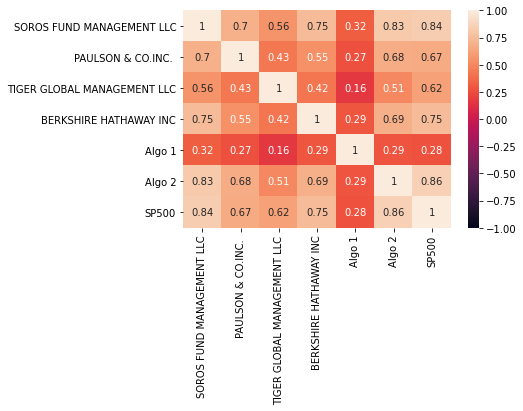

In [246]:
# Display de correlation matrix
sns.heatmap(all_correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Algo 1 Beta'}, xlabel='Date'>

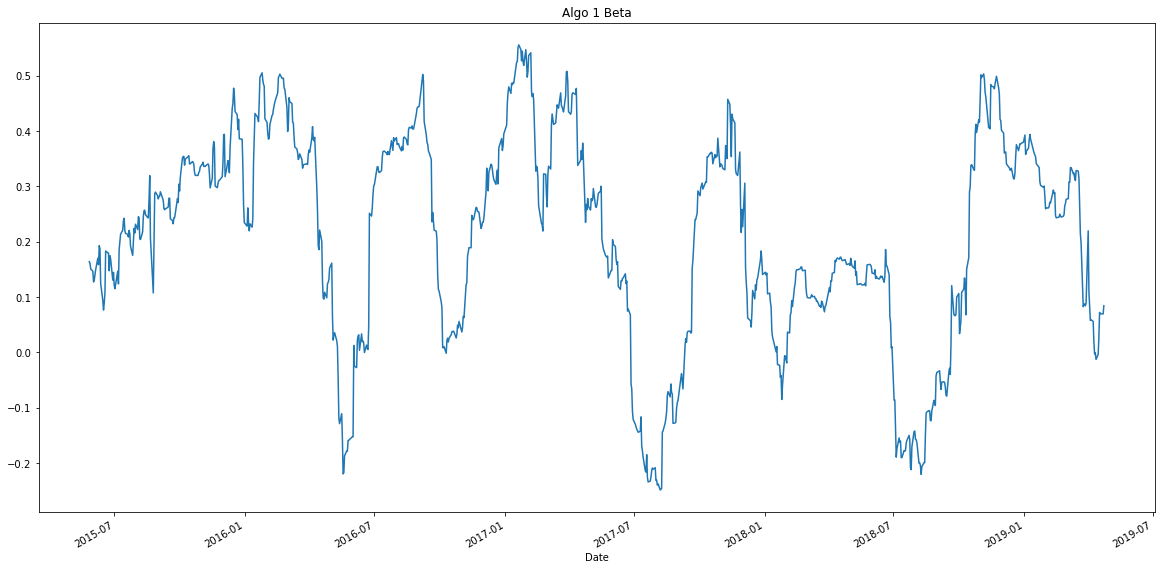

In [247]:
# Calculate covariance of a single portfolio
algo_1_covariance = all_daily_returns['Algo 1'].rolling(window=60).cov(all_daily_returns['SP500'])
# Calculate variance of S&P 500
SP500_variance = all_daily_returns['SP500'].rolling(window=60).var()
# Computing beta
algo_1_beta = algo_1_covariance / SP500_variance
# Plot beta trend
algo_1_beta.plot(title="Algo 1 Beta", figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

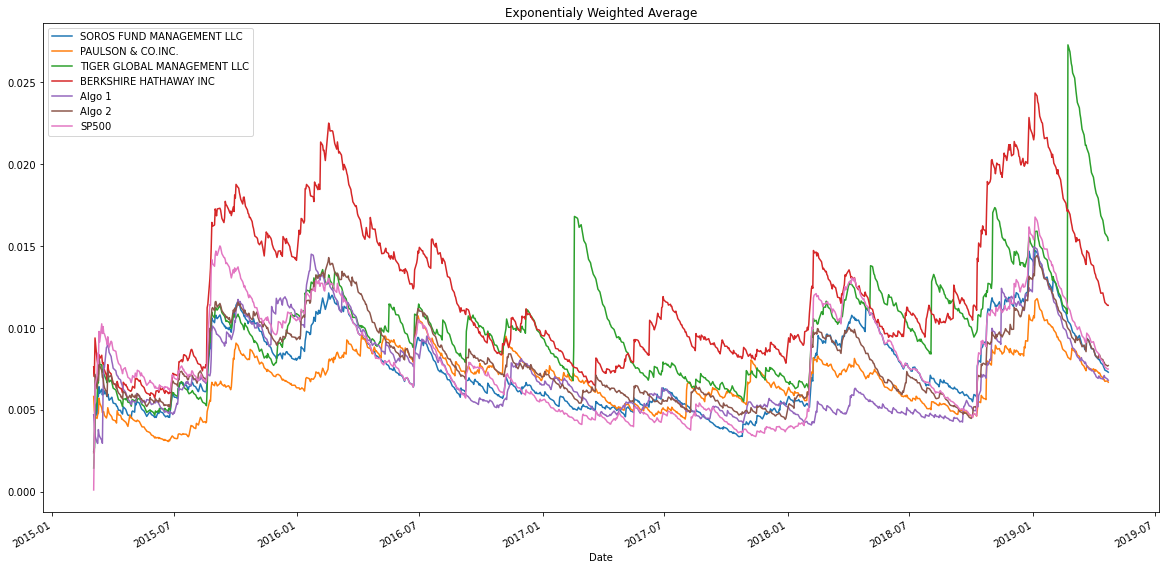

In [248]:
# Use `ewm` to calculate the rolling window
rolling_window_ewma = all_daily_returns.ewm(halflife=21, adjust=True).std()
rolling_window_ewma.plot(title="Exponentialy Weighted Average", figsize=(20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [249]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_daily_returns.mean() * 252) / (all_daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

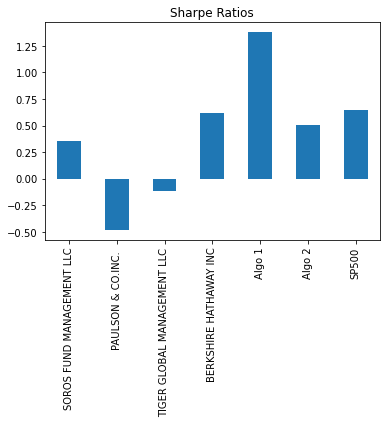

In [250]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

**Algorithmic strategy number 1 did indeed outperform both the market (S&P500) and the whales portfolios. Algorithmic strategy number 2, however, is slightly behind Berkshire Hathaway and the market (S&P500) in terms of the sharp ratio.**

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [251]:
# Reading data from 1st stock
google_returns_path = Path('Resources/goog_historical.csv')
google_df = pd.read_csv(google_returns_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [252]:
# Reading data from 2nd stock
apple_returns_path = Path('Resources/aapl_historical.csv')
apple_df = pd.read_csv(apple_returns_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [253]:
# Reading data from 3rd stock
costco_returns_path = Path('Resources/cost_historical.csv')
costco_df = pd.read_csv(costco_returns_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [254]:
# Combine all stocks in a single DataFrame
my_portfolio_returns = pd.concat([google_df, apple_df, costco_df], axis="columns", join='inner')
my_portfolio_returns.sort_index(ascending = True, inplace = True)
my_portfolio_returns

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18


In [255]:
# Reset Date index
my_portfolio_returns.index = my_portfolio_returns.index.normalize()


In [256]:
# Reorganize portfolio data by having a column per symbol
my_portfolio_returns = my_portfolio_returns.drop('Symbol', axis=1)
my_portfolio_returns.columns = ["GOOG", "AAPL", "COST"]
my_portfolio_returns.head()


,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [257]:
# Calculate daily returns
my_portfolio_daily_returns = my_portfolio_returns.pct_change()
# Drop NAs
my_portfolio_daily_returns.dropna(inplace=True)
# Display sample data
my_portfolio_daily_returns.head()


,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [258]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_weighted_returns = my_portfolio_daily_returns.dot(weights)
my_portfolio_weighted_returns = my_portfolio_weighted_returns.rename('My Portfolio')
# Display sample data
my_portfolio_weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
Name: My Portfolio, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [260]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios = pd.concat([all_daily_returns, my_portfolio_weighted_returns], axis='columns', join='inner')
combined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [263]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios.dropna(inplace=True)
combined_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [264]:
# Calculate the annualized `std`
combined_portfolio_std = pd.DataFrame(all_daily_returns.std()).rename(columns = {0:"STD"})
combined_portfolio_std.sort_values(['STD'], ascending=False)

,STD
BERKSHIRE HATHAWAY INC,0.012919
TIGER GLOBAL MANAGEMENT LLC,0.010894
SP500,0.008554
Algo 2,0.008342
SOROS FUND MANAGEMENT LLC,0.007895
Algo 1,0.007620
PAULSON & CO.INC.,0.007023


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD'}>

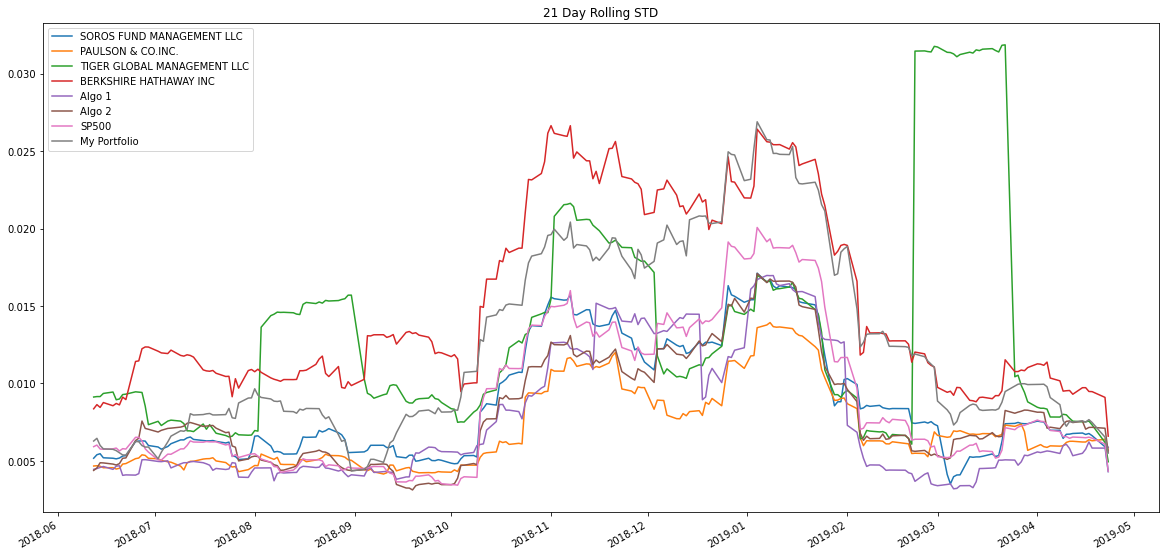

In [267]:
# Calculate rolling standard deviation
combined_portfolio_rolling_21 = combined_portfolios.rolling(window = 21).std()
# Plot rolling standard deviation
combined_portfolio_rolling_21.plot(title="21 Day Rolling STD", figsize = (20,10))

### Calculate and plot the correlation

In [269]:
# Calculate and plot the correlation
combined_correlation = combined_portfolios.corr()
combined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
SP500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
My Portfolio,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'My Portfolio Beta'}>

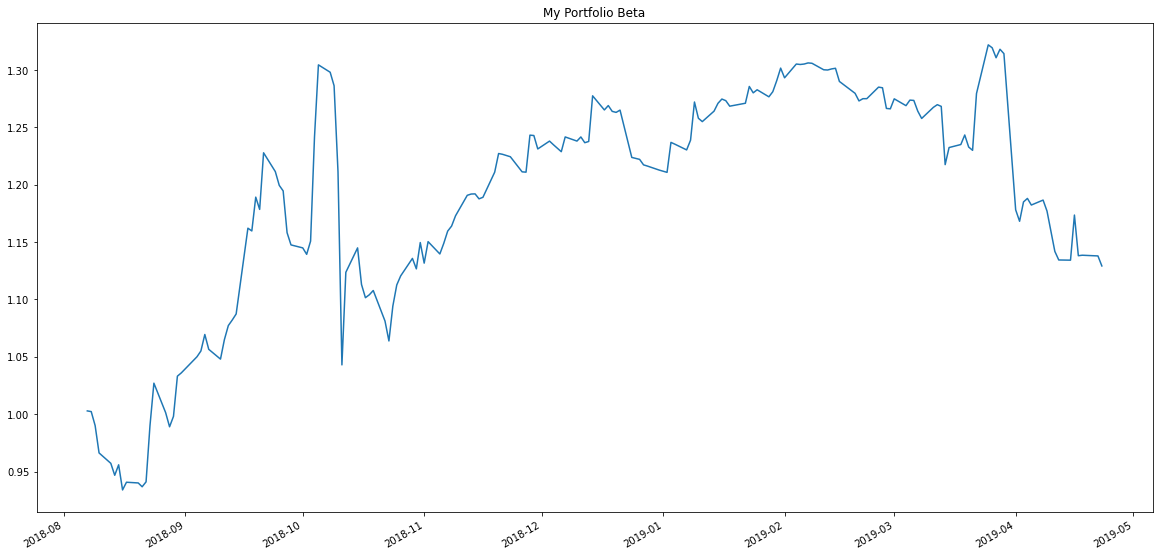

In [271]:
# Calculate and plot Beta
my_portfolio_covariance = combined_portfolios['My Portfolio'].rolling(window=60).cov(combined_portfolios['SP500'])
SP500_variance = all_daily_returns['SP500'].rolling(window=60).var()
my_portfolio_beta = my_portfolio_covariance / SP500_variance
my_portfolio_beta.plot(title="My Portfolio Beta", figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [273]:
# Calculate Annualzied Sharpe Ratios
combined_sharpe_ratios = (combined_portfolios.mean() * 252) / (combined_portfolios.std() * np.sqrt(252))
combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                          0.584820
My Portfolio                   0.933123
dtype: float64

<AxesSubplot:title={'center':'Combined Sharpe Ratios'}>

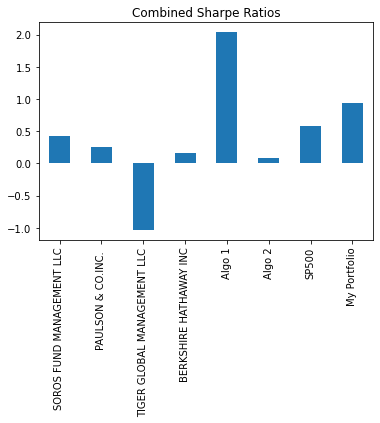

In [274]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind = "bar", title = "Combined Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

**My portfolio came in at 2nd place behind Algorithmic Strategy Number 1. In terms of the sharpe ratio, it has surpassed all the whales portfolios, Algorithmic Strategy Number 2, and the market (S&P500).**